In [30]:
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

170508288/170498071 [==============================] - 78s 0us/step


In [39]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [40]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [57]:
model = Sequential(name='MY_MODEL')
model.add(Conv2D(3, (3, 3), input_shape=(32, 32, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(1, (3, 3)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [58]:
model.summary()

Model: "MY_MODEL"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 3)         84        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 1)         28        
_________________________________________________________________
flatten_5 (Flatten)          (None, 169)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1700      
Total params: 1,812
Trainable params: 1,812
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer='adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['acc'])

In [60]:
history = model.fit(X_train, y_train,
epochs = 10,
validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 21s 16ms/step - loss: 13.6114 - acc: 0.1698 - val_loss: 3.4099 - val_acc: 0.1790
Epoch 2/10
1250/1250 [==============================] - 12s 9ms/step - loss: 2.4912 - acc: 0.2193 - val_loss: 2.1351 - val_acc: 0.2303
Epoch 3/10
1250/1250 [==============================] - 12s 10ms/step - loss: 2.0375 - acc: 0.2670 - val_loss: 1.9821 - val_acc: 0.2867
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.9567 - acc: 0.2961 - val_loss: 1.9406 - val_acc: 0.3037
Epoch 5/10
1250/1250 [==============================] - 13s 11ms/step - loss: 1.9172 - acc: 0.3133 - val_loss: 1.9233 - val_acc: 0.3190
Epoch 6/10
1250/1250 [==============================] - 14s 12ms/step - loss: 1.9019 - acc: 0.3171 - val_loss: 1.8830 - val_acc: 0.3328
Epoch 7/10
1250/1250 [==============================] - 16s 13ms/step - loss: 1.8872 - acc: 0.3257 - val_loss: 1.8659 - val_acc: 0.3350
Epoch 8/10
1250/1250 [==========================

In [61]:
X_test[0].shape

(32, 32, 3)

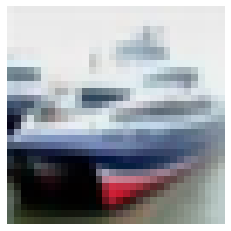

In [63]:
plt.imshow(X_test[1])
plt.axis('off')
plt.show()

In [64]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [68]:
y_pre = model.predict(X_test[1].reshape(1, 32, 32, 3))
y_pre

array([[0.13747771, 0.11018405, 0.09455278, 0.04007316, 0.02103548,
        0.0163151 , 0.01072499, 0.04914116, 0.23110268, 0.28939286]],
      dtype=float32)

In [69]:
index = y_pre.argmax()

In [70]:
class_names[index]

'truck'